In [40]:
# 환경설정

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#1. 일표본 t-검정 기초

# 우리 반 학생들의 키 데이터 (cm)
np.random.seed(42)
heights = np.array([172.5, 175.2, 168.9, 180.1, 173.7, 176.8, 169.4,
                   178.3, 171.6, 174.9, 177.2, 170.8, 175.5, 173.1,
                   179.6, 172.9, 176.1, 174.3, 171.2, 177.8])


In [ ]:
#1.1. 평균, 표준편차, 표본크기 구하기

mean_height = np.mean(heights)
std_dev = np.std(heights, ddof=1)
sample_size = len(heights)

print(f"평균: {mean_height:.2f} cm")
print(f"표준편차: {std_dev:.2f} cm")
print(f"표본 크기: {sample_size}")

평균: 174.50 cm
표준편차: 3.24 cm
표본 크기: 20


In [ ]:
#1.2. 전국 평균 키가 173cm일 때, 우리 반 평균이 전국 평균과 다른지 일표본 t-검정을 실행

national_mean = 173.0

#일표본 t-검정
t_stat, p_value = stats.ttest_1samp(heights, popmean=national_mean)

print(f"t-통계량: {t_stat:.4f}")
print(f"p-값: {p_value:.4f}")

#0.05보다 크기 때문에 귀무가설이 기각되지 않는다

t-통계량: 2.0656
p-값: 0.0528


In [ ]:
#1.3. 검정 결과의 p-value를 유의수준 0.05와 비교하여 결론을 출력하는 코드를 작성

national_mean = 173.0

#일표본 t-검정 수행
t_stat, p_value = stats.ttest_1samp(heights, popmean=national_mean)

#유의수준 정의
alpha = 0.05

#p-value와 유의수준을 비교하여 결론 출력
print(f"p-value: {p_value:.4f}")

#0.05보다 크기 때문에 귀무가설이 기각되지 않는다
#평균 키가 전국 키와 다르지 않다

p-value: 0.0528


In [ ]:
#2. 독립표본 t-검정

# A그룹과 B그룹의 점수 데이터
np.random.seed(123)
group_A = np.array([85, 87, 92, 78, 83, 89, 91, 86, 84, 88, 90, 82, 87, 89, 85])
group_B = np.array([78, 81, 85, 74, 79, 83, 86, 80, 77, 82, 84, 76, 81, 83, 79])


In [ ]:
#2.1. 두 그룹의 기본 통계량 구하기

mean_A = np.mean(group_A)
mean_B = np.mean(group_B)
std_dev_A = np.std(group_A, ddof=1)
std_dev_B = np.std(group_B, ddof=1)
sample_size_A = len(group_A)
sample_size_B = len(group_B)

print(f"A 그룹 평균: {mean_A:.2f}")
print(f"A 그룹 표준편차: {std_dev_A:.2f}")
print(f"A 그룹 표본 크기: {sample_size_A}")
print(f"B 그룹 평균: {mean_B:.2f}")
print(f"B 그룹 표준편차: {std_dev_B:.2f}")
print(f"B 그룹 표본 크기: {sample_size_B}")

A 그룹 평균: 86.40
A 그룹 표준편차: 3.72
A 그룹 표본 크기: 15
B 그룹 평균: 80.53
B 그룹 표준편차: 3.42
B 그룹 표본 크기: 15


In [ ]:
#2.2. 등분산성을 확인하는 Levene 검정 실행

#Levene: 두 개 이상의 그룹이 등분산을 가지는가

from scipy.stats import levene
stat, p_value = levene(group_A, group_B)

print(f"Levene 검정 통계량: {stat:.4f}")
print(f"p-value: {p_value:.4f}")

#pvalue가 0.05보다 키가 때문에 등분산이다 > 독립표본 t검정 사용 가능하다

Levene 검정 통계량: 0.0286
p-value: 0.8670


In [ ]:
#2.3. 독립표본 t-검정을 실행하고 두 그룹 간 평균 차이가 유의한지 확인

#독립표본 t검정: 두 독립된 그룹 간 평균이 통계적으로 유의미하게 다른가

#등분산성 검정
from scipy.stats import levene, ttest_ind
stat, p_levene = levene(group_A, group_B)
equal_var = p_levene >= 0.05  #True > 등분산

#독립표본 t-검정
t_stat, p_value = ttest_ind(group_A, group_B, equal_var=equal_var)

print(f"Levene p-value: {p_levene:.4f} → 등분산 가정: {equal_var}")
print(f"t-검정 통계량: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

#등분산 검정: 0.8670 > 0.05 (=등분산이다)
#독립표본 t검정: 0.0001 < 0.0005 (=귀무가설 기각, 두 그룹 간의 평균 차이는 통계적으로 유의미하다)

Levene p-value: 0.8670 → 등분산 가정: True
t-검정 통계량: 4.4974
p-value: 0.0001


In [ ]:
#3. 대응표본 t검정

# 학습 프로그램 전후 점수
students = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
before = np.array([65, 72, 68, 74, 69, 71, 67, 73, 70, 66])
after = np.array([70, 78, 72, 79, 75, 76, 71, 78, 74, 72])


In [ ]:
#3.1. 각 학생의 점수 향상도(after-before) 계산

improvement = after - before

for name, diff in zip(students, improvement):
    print(f"{name} 학생의 향상도: {diff}점")

A 학생의 향상도: 5점
B 학생의 향상도: 6점
C 학생의 향상도: 4점
D 학생의 향상도: 5점
E 학생의 향상도: 6점
F 학생의 향상도: 5점
G 학생의 향상도: 4점
H 학생의 향상도: 5점
I 학생의 향상도: 4점
J 학생의 향상도: 6점


In [ ]:
#3.2. 향상도의 평균, 표준편차 구하기

mean_improve = np.mean(improvement)
std_improve = np.std(improvement, ddof=1)  # ddof=1: 표본 표준편차

print(f"향상도의 평균: {mean_improve:.2f}점")
print(f"향상도의 표준편차: {std_improve:.2f}점")

향상도의 평균: 5.00점
향상도의 표준편차: 0.82점


In [ ]:
#3.3. 학습 프로그램이 효과가 있는지 대응표본 t-검정으로 확인

#대응표본 t검정: 같은 대상에게 두번 측정한 데이터에서 평균 차이가 통계적으로 유의미한가

from scipy.stats import ttest_rel
t_stat, p_value = ttest_rel(after, before)


print(f"대응표본 t-검정 통계량: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

#pvalue가 0.05보다 작기 때문에 두 데이터의 평균 차이는 있다 = 이는 통계적으로 유의미하다

대응표본 t-검정 통계량: 19.3649
p-value: 0.0000


In [ ]:
#4. 일원분산분석 ANOVA

# 세 개 처리법의 효과 데이터
treatment_A = np.array([23, 25, 28, 22, 26, 24, 27, 25])
treatment_B = np.array([28, 30, 32, 29, 31, 30, 33, 28])
treatment_C = np.array([20, 22, 24, 21, 23, 19, 25, 22])


In [ ]:
#4.1. 세 처리법의 각각의 평균 구하기

mean_A = np.mean(treatment_A)
mean_B = np.mean(treatment_B)
mean_C = np.mean(treatment_C)

print(f"처리 A의 평균: {mean_A:.2f}")
print(f"처리 B의 평균: {mean_B:.2f}")
print(f"처리 C의 평균: {mean_C:.2f}")

처리 A의 평균: 25.00
처리 B의 평균: 30.12
처리 C의 평균: 22.00


In [ ]:
#4.2. 일원 분산분석을 실행해서 세 처리법 간의 차이가 있는지 확인

#일원 분산분석: 세 그룹 이상의 평균이 모두 같은가
  #f통계량, p-value

# 일원 분산분석 (One-Way ANOVA)
f_stat, p_value = stats.f_oneway(treatment_A, treatment_B, treatment_C)

# 결과 출력
print(f"F-통계량: {f_stat:.4f}")
print(f"p-value: {p_value:.4f}")

#p-value가 0.05보다 작기 때문에 귀무가설 기각, 통계적으로 유의미한 차이가 있다
  #사후검정 필요하다

#stats.f_oneway( ) : 정규성+등분산성 가정, 만족하지 않으면 Kruskal-Wallis


F-통계량: 35.9540
p-value: 0.0000


In [ ]:
#5. 카이제곱 검정

# 성별과 선호 브랜드의 교차표
import pandas as pd

# 관찰된 빈도
observed_data = {
    'Brand_A': [45, 35],  # [남성, 여성]
    'Brand_B': [25, 45],
    'Brand_C': [30, 20]
}
observed = pd.DataFrame(observed_data, index=['Male', 'Female'])


In [ ]:
#5.1. 교차표를 출력하고 각 행과 열의 합계 구하기

print(observed)

observed_with_margins=observed.copy()
observed_with_margins['Total'] = observed.sum(axis=1)
observed_with_margins.loc['Total'] = observed.sum(axis=0)

print(observed_with_margins)

        Brand_A  Brand_B  Brand_C
Male         45       25       30
Female       35       45       20
        Brand_A  Brand_B  Brand_C  Total
Male       45.0     25.0     30.0  100.0
Female     35.0     45.0     20.0  100.0
Total      80.0     70.0     50.0    NaN


In [ ]:
#5.2. 카이제곱 독립성 검정 실행

#카이제곱 독립성 검정: 두 범주형 변수 간의 독립성 여부 검정
  #귀무가설: 독립이다

from scipy.stats import chi2_contingency

chi2, p_value, dof, expected = chi2_contingency(observed)
print(f"Chi-squared 통계량: {chi2:.4f}")
print(f"p-value: {p_value:.4f}")

#0.05보다 작기 때문에 두 변수 간의 차이는 통계적으로 유의미하다
#귀무가설 기각, 대립가설 채택, 독립이 아니다, 관련이 있다

Chi-squared 통계량: 8.9643
p-value: 0.0113


In [ ]:
#5.3. 성별과 브랜드 선호도가 독립적인지 p value로 판단

#0.05보다 작기 때문에 두 변수 간의 차이는 통계적으로 유의미하다
#귀무가설 기각, 대립가설 채택, 독립이 아니다, 관련이 있다

In [ ]:
#6. 정규성 검정

# 두 개의 서로 다른 분포 데이터
np.random.seed(456)
data1 = np.random.normal(50, 10, 30)  # 정규분포
data2 = np.random.exponential(2, 30)   # 지수분포


In [ ]:
#6.1. data1에 대해 Shapiro-Wilk 정규성 검정을 실행

#데이터가 정규분포에 따르는가

from scipy.stats import shapiro

stat, p_value = shapiro(data1)

print(f"Shapiro-Wilk 검정 통계량: {stat:.4f}")
print(f"p-value: {p_value:.4f}")

#0.05보다 크기 때문에 정규 분포를 따른다. 귀무가설을 채택한다.

Shapiro-Wilk 검정 통계량: 0.9786
p-value: 0.7866


In [ ]:
#6.2. data2에 대해 Shapiro-Wilk 정규성 검정을 실행

#데이터가 정규분포에 따르는가

from scipy.stats import shapiro

stat, p_value = shapiro(data2)

print(f"Shapiro-Wilk 검정 통계량: {stat:.4f}")
print(f"p-value: {p_value:.4f}")

#0.05보다 작기 때문에 정규 분포를 따르지 않는다. 귀무가설을 기각한다.

Shapiro-Wilk 검정 통계량: 0.8106
p-value: 0.0001


In [ ]:
#6.3. 둘 중 어느 것이 정규분포를 따르는지

#data1

In [ ]:
#6.4.  data1에 대해 Kolmogorov-Smirnov 정규성 검정을 실행

#데이터가 정규분포를 따르는가

from scipy.stats import kstest, zscore

#표준화
data1_standardized = zscore(data1)

stat, p_value = kstest(data1_standardized, 'norm')

print(f"Kolmogorov-Smirnov 통계량: {stat:.4f}")
print(f"p-value: {p_value:.4f}")

#0.05보다 크다. 정규성을 따른다. 귀무가설을 채택한다

Kolmogorov-Smirnov 통계량: 0.1023
p-value: 0.8805


In [ ]:
#7. 비율 검정

# 두 광고의 클릭 데이터
ad_A_clicks = 127      # 광고 A를 클릭한 사용자 수
ad_A_total = 1000      # 광고 A에 노출된 총 사용자 수
ad_B_clicks = 98       # 광고 B를 클릭한 사용자 수
ad_B_total = 800       # 광고 B에 노출된 총 사용자 수

In [ ]:
#7.1. 각 광고의 클릭률(비율) 계산

ad_A_click_rate = ad_A_clicks / ad_A_total
ad_B_click_rate = ad_B_clicks / ad_B_total

print(f"광고 A의 클릭률: {ad_A_click_rate:.4f}")
print(f"광고 B의 클릭률: {ad_B_click_rate:.4f}")

광고 A의 클릭률: 0.1270
광고 B의 클릭률: 0.1225


In [ ]:
#7.2. 두 광고의 클릭률이 같은지 비율 검정 실행

from statsmodels.stats.proportion import proportions_ztest

# 성공 횟수 (클릭 수)
clicks = [127, 98]

# 각 집단의 관측 수 (노출 수)
totals = [1000, 800]

# z-검정 실행
z_stat, p_value = proportions_ztest(count=clicks, nobs=totals)

# 결과 출력
print(f"Z-통계량: {z_stat:.4f}")
print(f"p-value: {p_value:.4f}")

#0.05보다 크다. 두 광고의 클릭률의 차이는 통계적으로 유의미하지 않다

Z-통계량: 0.2869
p-value: 0.7742


In [ ]:
#7.3. 문제 7-3: 어느 광고가 더 효과인가

#광고 클릭률 자체는 A가 더 높지만 비율 검정 결과, 두 광고의 차이는 통계적으로 유의미하지 않기 때문에
#판단하기 어렵다

In [ ]:
#8. 검정력 분석

# 표본 크기가 20, 효과 크기가 0.5, 유의수준이 0.05일 때,
# 일표본 t-검정의 검정력을 구한 결과이다.

from statsmodels.stats.power import TTestPower

power = TTestPower()
power.power(effect_size=0.5, nobs=20, alpha=0.05)

np.float64(0.5645044184390379)

In [ ]:
#8.1. 검정력이 0.8이 되려면 필요한 표본 크기 (효과크기 0.5, 유의수준 0.05)

from statsmodels.stats.power import TTestPower

power_analysis = TTestPower()

required_n = power_analysis.solve_power(effect_size=0.5, power=0.8, alpha=0.05)

print(required_n)

#검정력이 0.8이 되기 위한 최소 표본 크기는 34개이다.

33.36713118431778


In [ ]:
#9. 다중비교

# 네 개 그룹의 데이터
group1 = np.array([20, 22, 24, 21, 23, 25, 22, 24])
group2 = np.array([25, 27, 29, 26, 28, 30, 27, 29])
group3 = np.array([22, 24, 26, 23, 25, 27, 24, 26])
group4 = np.array([18, 20, 22, 19, 21, 23, 20, 22])


In [ ]:
#9.1. 네 그룹에 대해 일원 분산분석 실행

from scipy.stats import f_oneway

f_stat, p_value = f_oneway(group1, group2, group3, group4)

print(f"F-통계량: {f_stat:.4f}")
print(f"p-value: {p_value:.4f}")

#p-value가 0.05보다 작기 때문에 그룹 간 평균의 차이는 통계적으로 유의미하다

F-통계량: 25.1237
p-value: 0.0000


#9.2. ANOVA에서 유의한 결과가 나왔다면, 사후 검정(Tukey HSD)을 실행하세요.

- hint.
    - `from statsmodels.stats.multicomp import pairwise_tukeyhsd`로 패키지 임포트
    - `pairwise_tukeyhsd` 함수는 별도의 그룹 배열들이 아니라, **하나의 데이터 배열과 그룹 라벨 배열**을 필요
        - **데이터 결합**: `np.concatenate()`로 모든 그룹 데이터를 하나로 합침
        - **그룹 라벨 생성**: 각 데이터 포인트가 어느 그룹에 속하는지 표시
        - **올바른 함수 호출**: `pairwise_tukeyhsd(데이터, 그룹라벨, alpha=0.05)`

In [ ]:
#사후검정: ANOVA에서 유의미한 결과 나옴 > 어떤 그룹에서 차이가 있는지 개별적으로 확인
  #Tukey HSD: 모든 가능한 그룹쌍 간의 평균 차이 통계적으로 검정

from statsmodels.stats.multicomp import pairwise_tukeyhsd

all_data = np.concatenate([group1, group2, group3, group4])

group_labels = (
    ['group1'] * len(group1) +
    ['group2'] * len(group2) +
    ['group3'] * len(group3) +
    ['group4'] * len(group4))

tukey_result = pairwise_tukeyhsd(endog=all_data, groups=group_labels, alpha=0.05)
print(tukey_result)

#1-2, 2-3, 2-4, 3-4 : 그룹 간 차이가 통계적으로 유의미하다
#group 2가 가장 높은 평균, group 4가 가장 낮은 평균을 갖을 것

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
group1 group2      5.0    0.0  2.6997  7.3003   True
group1 group3      2.0 0.1057 -0.3003  4.3003  False
group1 group4     -2.0 0.1057 -4.3003  0.3003  False
group2 group3     -3.0 0.0069 -5.3003 -0.6997   True
group2 group4     -7.0    0.0 -9.3003 -4.6997   True
group3 group4     -4.0 0.0003 -6.3003 -1.6997   True
----------------------------------------------------


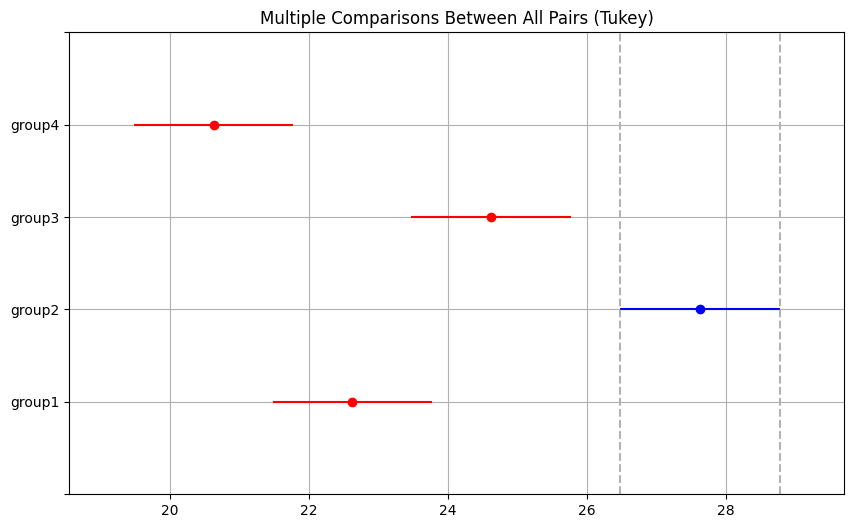

In [ ]:
import matplotlib.pyplot as plt

tukey_result.plot_simultaneous(comparison_name='group2')
plt.grid(True)
plt.show()

# 2: 다른 그룹과 모두 통계적으로 유의한 차이가 있다 > 효과가 가장 크다
# 3, 4 사이에도 유의한 차이가 있다 (신뢰구간이 안 겹침)
# 1을 기준으로 3, 4는 신뢰구간이 겹친다 > 유의한 차이가 없을 가능성이 높다